# Анализ сервиса аренды самокатов GoFast
Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

- без подписки
 - абонентская плата отсутствует;
 - стоимость одной минуты поездки — 8 рублей;
 - стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra
  - абонентская плата — 199 рублей в месяц;
  - стоимость одной минуты поездки — 6 рублей;
  - стоимость старта — бесплатно.

# Описание данных

**Пользователи — users_go.csv**

- user_id — уникальный идентификатор пользователя
- name — имя пользователя
- age — возраст
- city — город
- subscription_type — тип подписки (free, ultra)

**Поeздки — rides_go.csv**

- user_id — уникальный идентификатор пользователя
- distance — расстояние, которое пользователь проехал в текущей сессии (в метрах)
- duration — продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- date — дата совершения поездки

**Подписки — subscriptions_go.csv**

- subscription_type — тип подписки
- minute_price — стоимость одной минуты поездки по данной подписке
- start_ride_price — стоимость начала поездки
- subscription_fee — стоимость ежемесячного платежа

# План работы
- Выполнить предобработку данных: проверить отстутсвие пропусков / дубликатов. Привести к удобному для исследования формату. 
- Исследовать данные, визуализировать, ознакомиться.
- Объеденить датафреймы. 
- Подсчитать выручку.
- Обработать гипотезы от продакт-менеджеров.
- Сделать вывод на основе данного исследования.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from scipy import stats as st

#### Шаг 1. Загрузка данных

In [2]:
data_users = pd.read_csv('/datasets/users_go.csv')

In [3]:
data_users.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [4]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


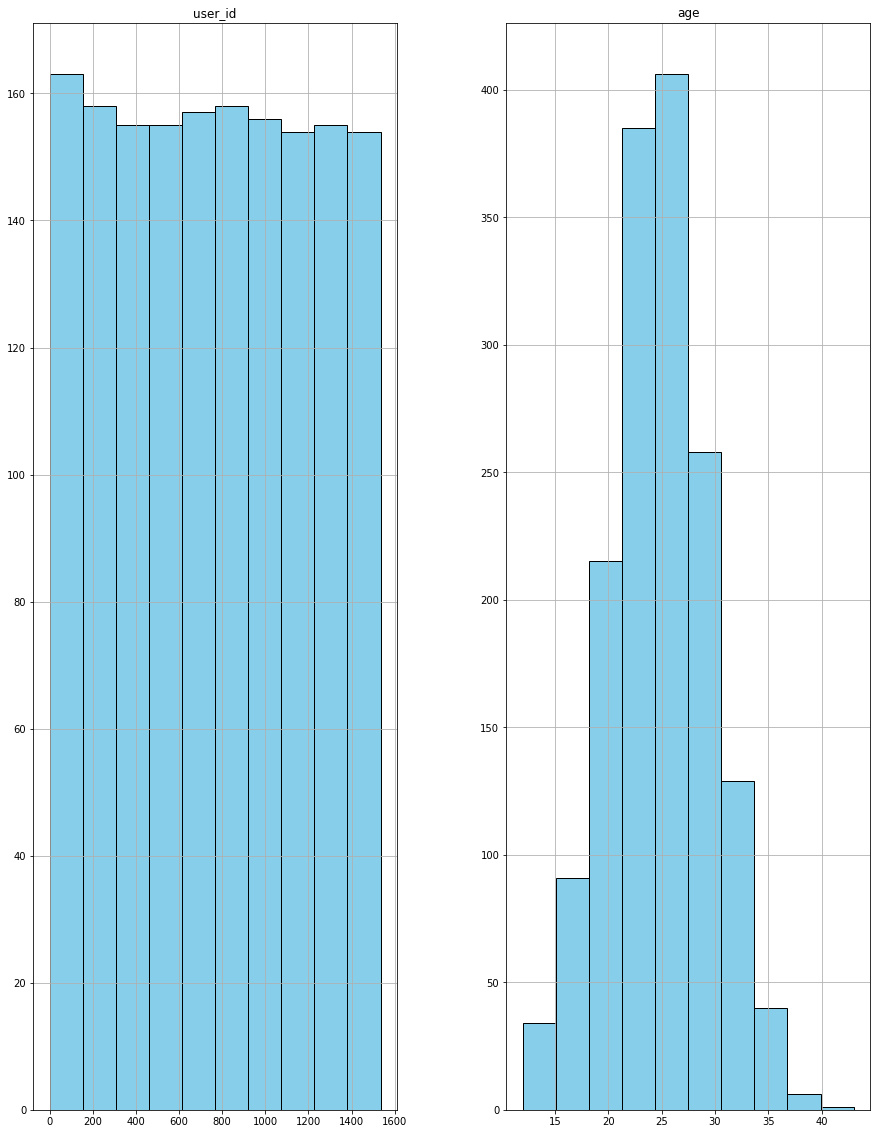

In [5]:
data_users.hist(
    figsize=(15, 20),
    color='skyblue',  
    edgecolor='black'
)
plt.show()

In [6]:
data_users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [7]:
data_users.duplicated().sum()

31

In [8]:
# удалим их сразу:
data_users.drop_duplicates(inplace=True)


##### Вывод по первому датасету: 
Пять колонок(Series). Пропусков нет, явных дубликатов несколько, подозреваю что из-за имен. 
колонка с возрастом - так же видим нормальное распределение.

In [9]:
data_riders = pd.read_csv('/datasets/rides_go.csv')

In [10]:
data_riders.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [11]:
data_riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


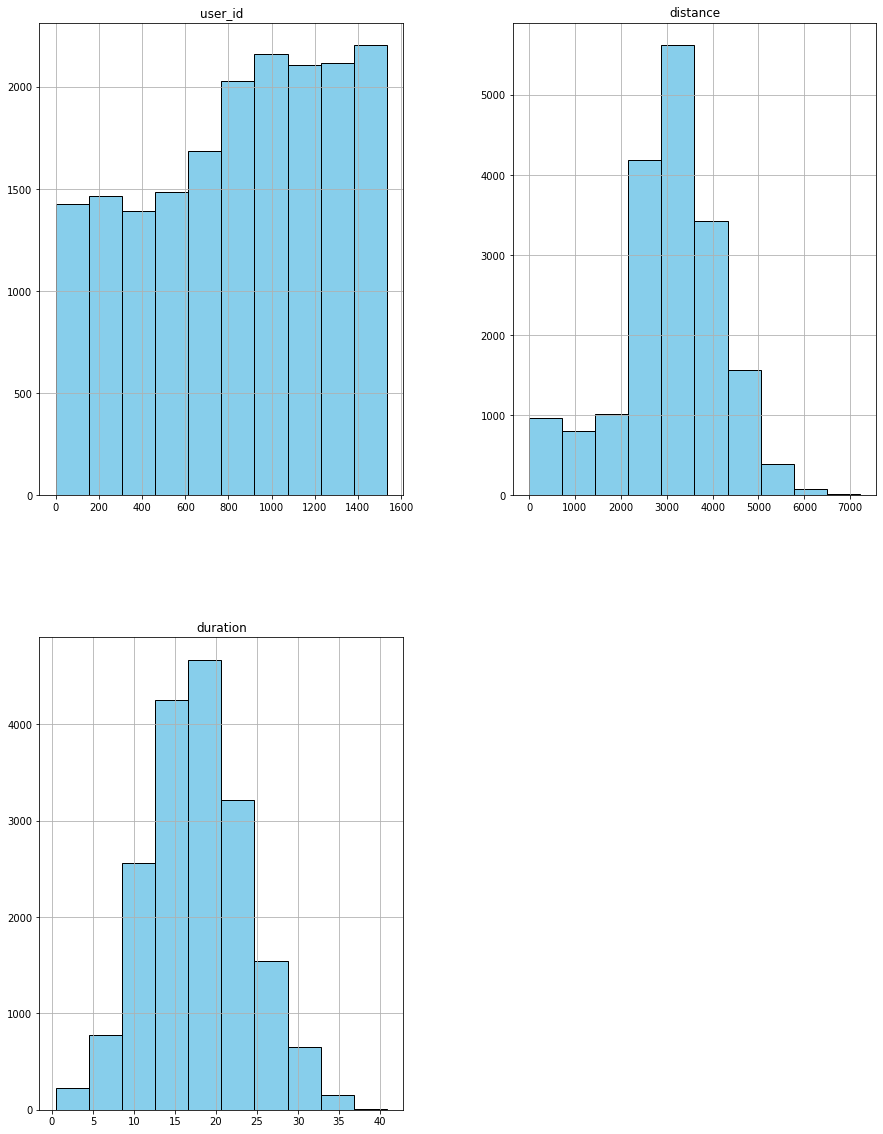

In [12]:
data_riders.hist(
    figsize=(15, 20),
    color='skyblue',  
    edgecolor='black'
)
plt.show()

In [13]:
data_riders.isna().sum()

user_id     0
distance    0
duration    0
date        0
dtype: int64

In [14]:
data_riders.duplicated().sum()

0

##### Вывод по второму датасету: 
Три коллонки(Series). Пока не понял почему такое распределение на ID, но в продолжительности и в дистанции четко видно нормальное распределение. Пропусков нет, явных дубликатов тоже. 

In [15]:
data_sub = pd.read_csv('/datasets/subscriptions_go.csv')

In [16]:
data_sub.head(10)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [17]:
 data_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


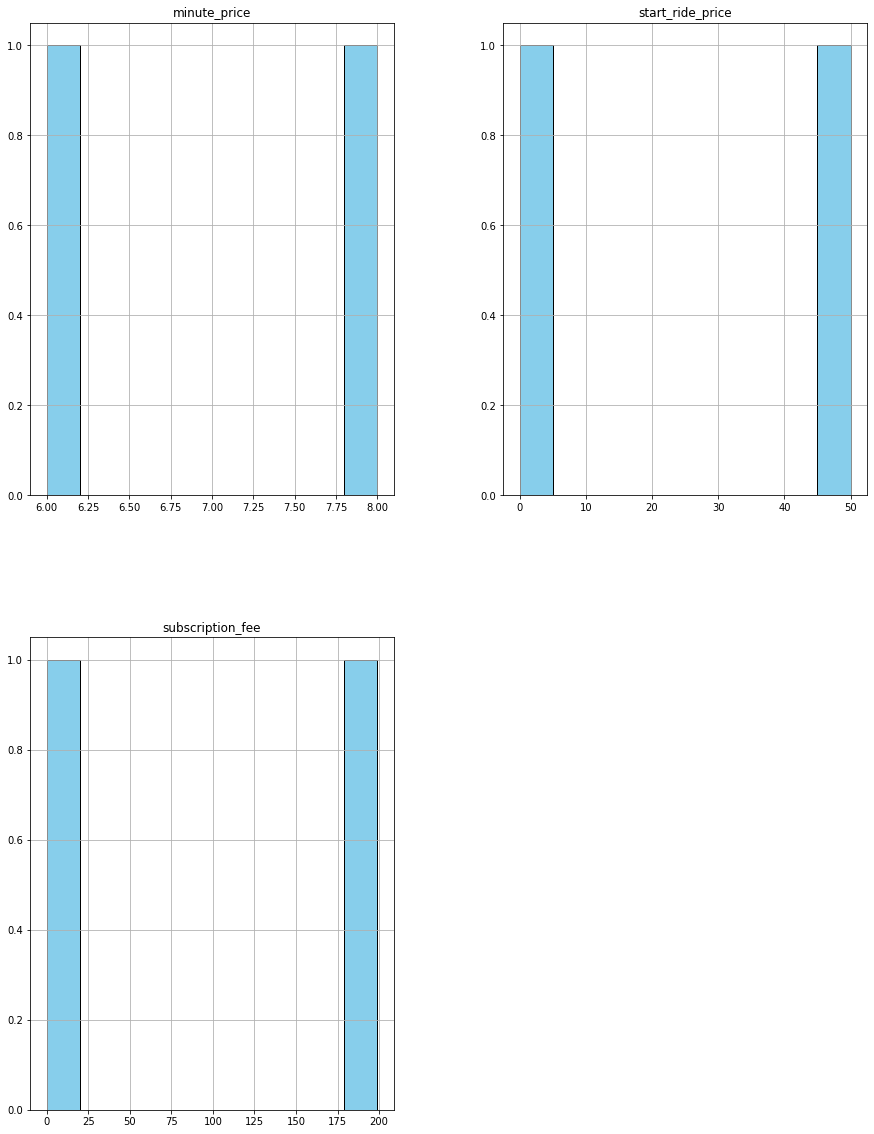

In [18]:
data_sub.hist(
    figsize=(15, 20),
    color='skyblue',  
    edgecolor='black'
    
)
plt.show()

In [19]:
data_sub.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [20]:
data_sub.duplicated().sum()

0

##### Вывод по последнему датасету: Пропусков нет, дубликтов явных тоже. На графиках видим, по сути, распределение Бернулли. Так как наличие подписки( По сути = True) или ее отсутствие ( =False)  задает два возможных исхода.

##### Общий вывод: Ознакомились с данными, посмотрели что не требуется заполнять пропуски / искать дубликаты. Продолжим изучение. 

#### Шаг 2. Предобработка данных

In [21]:
#Исходя из задания, приведем столбец data к корректному значению, а атк же добавим номер месяца. 
data_riders['date'] = pd.to_datetime(data_riders['date'], format = '%Y-%m-%d')


In [22]:
data_riders['date'].head(10)


0   2021-01-01
1   2021-01-18
2   2021-04-20
3   2021-08-11
4   2021-08-28
5   2021-10-09
6   2021-10-19
7   2021-11-06
8   2021-11-14
9   2021-11-22
Name: date, dtype: datetime64[ns]

In [23]:
data_riders['month'] = data_riders['date'].dt.month

In [24]:
year = data_riders['date'].dt.year.unique()
year

array([2021])

In [25]:
data_riders['month'].head(10)


0     1
1     1
2     4
3     8
4     8
5    10
6    10
7    11
8    11
9    11
Name: month, dtype: int64

##### Вывод: Дубликаты удалили ранее. Пропусков нет - убедились ранее, столбец добавили, столбец с датой привели к необходимому формату.

#### Шаг 3. Исследовательский анализ данных

##### Частота встречаемости городов


In [26]:
count_users_by_city = data_users['city'].value_counts()
count_users_by_city


Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

In [27]:
# Посчитаем процентное соотношение
count_users_by_city['rate'] = round(data_users['city'].value_counts() / count_users_by_city.sum(), 2) * 100
count_users_by_city['rate']

Пятигорск         14.0
Екатеринбург      13.0
Ростов-на-Дону    13.0
Краснодар         13.0
Сочи              12.0
Омск              12.0
Тюмень            12.0
Москва            11.0
Name: city, dtype: float64

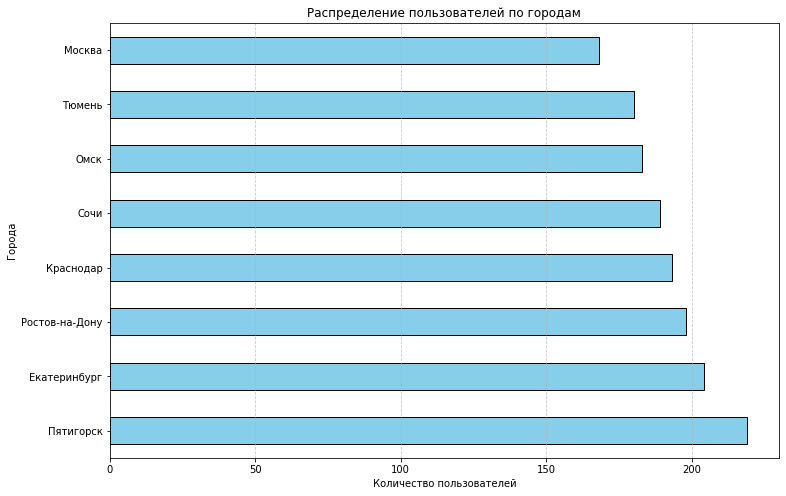

In [28]:
data_users['city'].value_counts().plot(
    kind='barh',  
    figsize=(12, 8), 
    color='skyblue',  
    edgecolor='black',
    title='Распределение пользователей по городам'  
)
plt.xlabel('Количество пользователей')  
plt.ylabel('Города')  
plt.grid(axis='x', linestyle='--', alpha=0.7)  
plt.show()

###### Вывод:  Больше всего пользователей в Пятигорске, меньше всего в Москве.



##### Соотношение пользователей с подпиской и без подписки



In [29]:
data_users['subscription_type'].value_counts()


free     835
ultra    699
Name: subscription_type, dtype: int64

In [30]:
count_sub_percent = data_users['subscription_type'].value_counts(normalize=True) * 100  


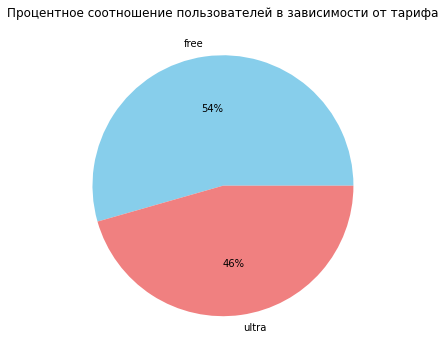

In [31]:
ax = count_sub_percent.plot(
    kind='pie',  
    figsize=(6, 6),  
    autopct='%1.0f%%', 
    colors=['skyblue', 'lightcoral'], 
    title='Процентное соотношение пользователей в зависимости от тарифа',
    legend=False 
)
plt.ylabel('')  
plt.show()


###### Вывод: пользователей с бесплатной подпиской чуть больше. Распределение, как я раньше отмечал, по сути является распределением Бернулли. 


##### Возраст пользователей


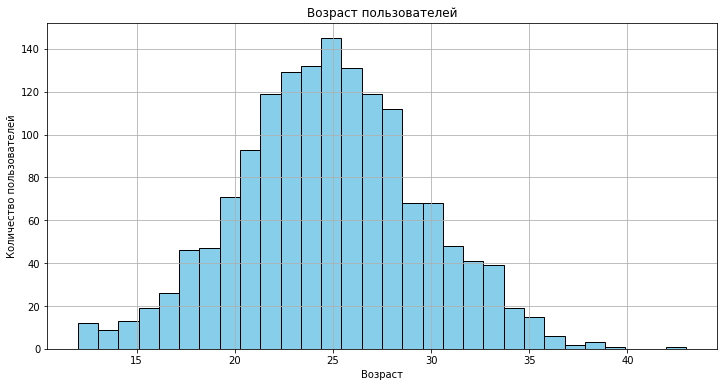

In [32]:
data_users['age'].plot(
    kind = 'hist',
    figsize=(12, 6),  
    color='skyblue',  
    edgecolor='black',  
    grid=True,
    bins = 30
)
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.show()



In [33]:

data_users['age'].describe() 



count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

###### Вывод: возраст пользователей имеет нормальное распределение. Самоому младшему пользователю 12 лет, старшему - 43. Больше всего пользователей в возрасте 25 лет. Межкварительный размах - от 22 лет до 28. 

##### Расстояние, которое пользователь преодолел за одну поездку


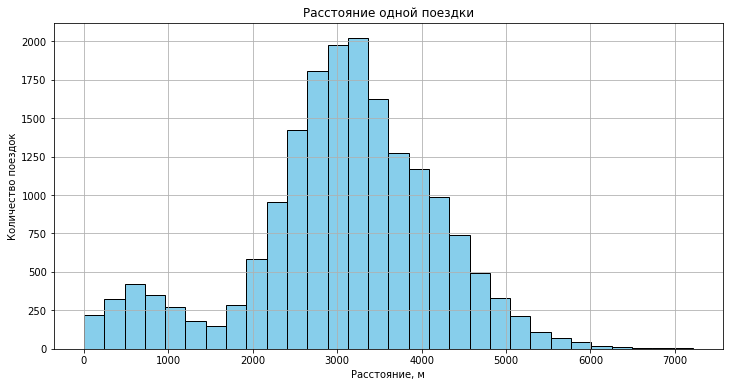

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

In [34]:
data_riders['distance'].plot(
    kind = 'hist',
    figsize=(12, 6),  
    color='skyblue',  
    edgecolor='black',  
    grid=True,
    bins = 30)
plt.title('Расстояние одной поездки')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.show()

data_riders['distance'].describe()

#####  Вывод: Мы видим преимущественно нормальное распределение. Скорее даже два:
- с пиком в районе 600м
- с пиком в районе 3000м


Как видим из описания данных,  межквартильный размах приходится на размах от 2543 до 3776. Возможно в дальнейшем придется отсчечь выбросы для более точного анализа. Так же допускаю, что до у нас есть несколько категорий пользователей: 
- Те кто используют самокат, для поездок более 2000м. 
- Те, кто используют самокат для коротких поездок до 1000м. 

##### Продолжительность поездок


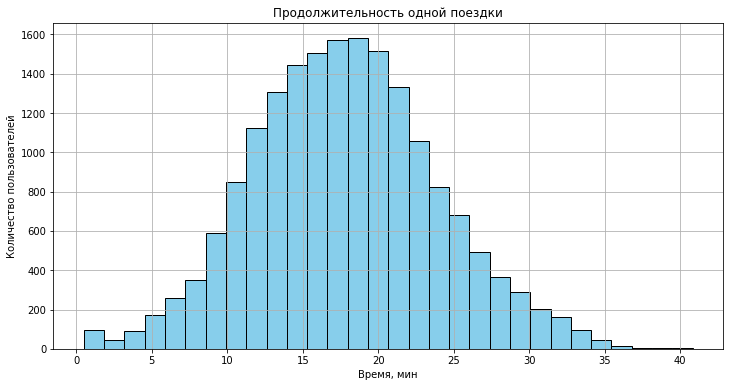

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

In [35]:
 data_riders['duration'].plot(
     kind = 'hist',
    figsize=(12, 6),  
    color='skyblue',  
    edgecolor='black',  
    grid=True,
    bins = 30
 )
plt.title('Продолжительность одной поездки')
plt.xlabel('Время, мин')
plt.ylabel('Количество пользователей')
plt.show()

data_riders['duration'].describe()

##### Аналогично, видим нормальное распределение. С небольшим выбросом в начале, предполагаю что это пользователи с неудачным опытом взаимодействия с приложением / самокатом.  Межквартильный размах от 13,6 минут до 21,7.

##### Общий вывод: с данными можно работать, кричиных выбросов не обнаружено. Далее объеденим их.

#### Шаг 4. Объединение данных

In [36]:
# Объденим 3 датафрейма в один:
data_mrg = data_riders.merge(data_users, how = 'left', on = 'user_id' )
data_mrg = data_mrg.merge(data_sub, how = 'left', on='subscription_type')
data_mrg

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11,Альберт,25,Краснодар,free,8,50,0
18064,1534,2840.423057,21.409799,2021-11-16,11,Альберт,25,Краснодар,free,8,50,0
18065,1534,3826.185507,18.435051,2021-11-18,11,Альберт,25,Краснодар,free,8,50,0
18066,1534,2902.308661,16.674362,2021-11-27,11,Альберт,25,Краснодар,free,8,50,0


In [37]:
#Строк в data_riders: 
data_riders.shape[0]

18068

In [38]:
#Строк в объединенном data_mrg: 
data_mrg.shape[0]

18068

In [39]:
# Пропуски в объединенном датафрейме
data_mrg.isna().sum()

user_id              0
distance             0
duration             0
date                 0
month                0
name                 0
age                  0
city                 0
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [40]:
# И дубликаты
data_mrg.duplicated().sum()

0

##### Все корректно объеденилось: количество строчек совпадает, пропусков нет, явных дубликатов тоже.

##### Создадим ещё два датафрейма из датафрейма из большого общего:
- c данными о пользователях без подписки;

- с данными о пользователях с подпиской.

In [41]:
# С бесплатной подпиской
data_mrg_free = data_mrg[data_mrg['subscription_type'] == 'free']
data_mrg_free 

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
6500,700,2515.690719,14.944286,2021-01-02,1,Айдар,22,Омск,free,8,50,0
6501,700,846.932642,16.234663,2021-02-01,2,Айдар,22,Омск,free,8,50,0
6502,700,4004.434142,20.016628,2021-02-04,2,Айдар,22,Омск,free,8,50,0
6503,700,1205.911290,9.782872,2021-02-10,2,Айдар,22,Омск,free,8,50,0
6504,700,3047.379435,17.427673,2021-02-14,2,Айдар,22,Омск,free,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11,Альберт,25,Краснодар,free,8,50,0
18064,1534,2840.423057,21.409799,2021-11-16,11,Альберт,25,Краснодар,free,8,50,0
18065,1534,3826.185507,18.435051,2021-11-18,11,Альберт,25,Краснодар,free,8,50,0
18066,1534,2902.308661,16.674362,2021-11-27,11,Альберт,25,Краснодар,free,8,50,0


In [42]:
# С платной подпиской ultra
data_mrg_ultra = data_mrg[data_mrg['subscription_type'] == 'ultra']

data_mrg_ultra.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


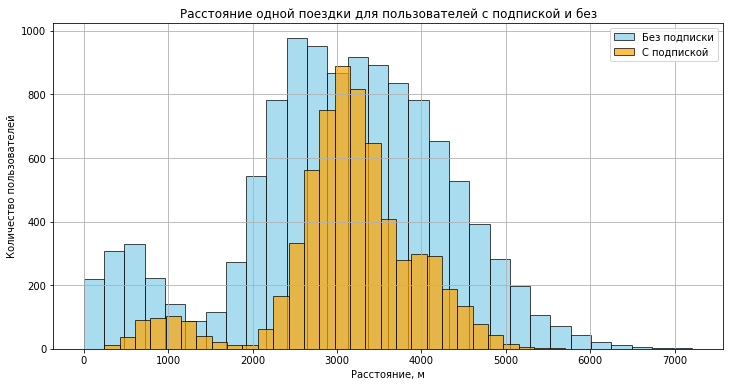

In [43]:
# Построим два графика на одной плоскости но с разными цветами для наглядности, сначал а с данным расстоянии:
plt.figure(figsize=(12, 6))

plt.hist(
    data_mrg_free['distance'], 
    bins=30, 
    color='skyblue', 
    edgecolor='black', 
    alpha=0.7,  
    label='Без подписки'
)
plt.hist(
    data_mrg_ultra['distance'], 
    bins=30, 
    color='orange',  
    edgecolor='black', 
    alpha=0.7,  
    label='С подпиской'
)

plt.title('Расстояние одной поездки для пользователей с подпиской и без')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество пользователей')
plt.legend(loc='upper right')  
plt.grid(True)

plt.show()

In [44]:
data_mrg_free['distance'].describe()


count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

In [45]:
data_mrg_ultra['distance'].describe() 

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

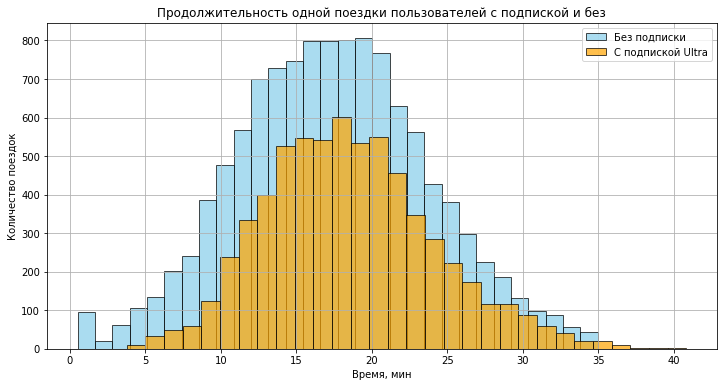

In [46]:
# И графики о времени поездки:
plt.figure(figsize=(12, 6))


plt.hist(
    data_mrg_free['duration'], 
    bins=30, 
    color='skyblue', 
    edgecolor='black', 
    alpha=0.7,  
    label='Без подписки'
)


plt.hist(
    data_mrg_ultra['duration'], 
    bins=30, 
    color='orange',  
    edgecolor='black', 
    alpha=0.7,  
    label='С подпиской Ultra'
)

plt.title('Продолжительность одной поездки пользователей с подпиской и без')
plt.xlabel('Время, мин')
plt.ylabel('Количество поездок')
plt.legend(loc='upper right')  
plt.grid(True)
plt.show()

In [47]:
data_mrg_free['duration'].describe() 


count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

In [48]:
data_mrg_ultra['duration'].describe()


count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

##### Вывод:
Визуально графики схожи, имеют нормальное распределение.   

По расстоянию: 
- Межквартильный размах без подписки - с 2366 м до 3905 м 
- Межквартильный размах с подпиской - с 2785 м до 3560 м

По продолжительности: 
- Межквартильный размах без подписки - с 12.9 мин до 21.5 мин
- Межквартильный размах с подпиской - с 14.5 мин до 21.8 мин


Как мы знаем из 3.2 что пользователей без подписки больше незначительно(835 против 699), количество поездок совершенных без подписки больше ощутимо: 
- 11568

Против :
- 6500 поездок с подпиской. 





#### Шаг 5. Подсчёт выручки

In [49]:
# Осуществим сначала округление. 
data_mrg['duration'] = np.ceil(data_mrg['duration'])

In [50]:
# Сведем в единую таблицу. Агреггируем по связке месяц + id пользователя. 
# Нас интересуеют значения : дистанция, продолжительность, имя и тип подписки
# Дистанцию и продожительнось мы суммируем, имя - len - считаем количество поездок пользователем в месяц,
# И опредеяем его тип подписки.
final_data = pd.pivot_table(data_mrg,
                           index=['month', 'user_id'],
                           values = ['distance', 'duration', 'name', 'subscription_type'],
                           aggfunc = {'distance': sum, 
                                      'duration' : sum, 
                                      'name' : len, 
                                      'subscription_type' : min})
final_data

distance  duration  name subscription_type
month user_id                                               
1     1        7027.511294      42.0     2             ultra
      3        3061.777147      13.0     1             ultra
      5        3914.646990      13.0     1             ultra
      7        6478.080979      28.0     2             ultra
      12       3577.151148      33.0     1             ultra
...                    ...       ...   ...               ...
12    1525     4597.854350      34.0     1              free
      1526     3644.121544      23.0     1              free
      1528     3998.569324      11.0     1              free
      1532     6111.889853      42.0     2              free
      1534     2371.711192      16.0     1              free

[11331 rows x 4 columns]

In [51]:
# Таблица разбита на месяцы и пользователей, переименуем колонки. 
final_data.rename(columns = {'name' : 'count_tips'}, inplace = True)
final_data

distance  duration  count_tips subscription_type
month user_id                                                     
1     1        7027.511294      42.0           2             ultra
      3        3061.777147      13.0           1             ultra
      5        3914.646990      13.0           1             ultra
      7        6478.080979      28.0           2             ultra
      12       3577.151148      33.0           1             ultra
...                    ...       ...         ...               ...
12    1525     4597.854350      34.0           1              free
      1526     3644.121544      23.0           1              free
      1528     3998.569324      11.0           1              free
      1532     6111.889853      42.0           2              free
      1534     2371.711192      16.0           1              free

[11331 rows x 4 columns]

In [52]:
#Отсортируем помесячно и посмотрим:
final_data.sort_values(by='month').head(10)


distance  duration  count_tips subscription_type
month user_id                                                      
1     1         7027.511294      42.0           2             ultra
      1061     12637.249630      43.0           3              free
      1063      3276.362299      10.0           1              free
      1064      5297.324649      15.0           1              free
      1065     14547.099333      99.0           4              free
      1066      2809.064949      19.0           1              free
      1067      3864.900780      22.0           1              free
      1069      7007.076943      53.0           3              free
      1071      3635.094136      15.0           1              free
      1072      2498.615999      11.0           1              free

In [53]:
#И выведем например пользователя c  ID = 3
final_data.query('user_id == 3')

,,distance,duration,count_tips,subscription_type
month,user_id,,,,
1,3,3061.777147,13.0,1,ultra
2,3,5421.152016,39.0,2,ultra
4,3,2956.651632,21.0,1,ultra
5,3,9064.026918,63.0,3,ultra
7,3,10919.595403,67.0,3,ultra
9,3,2891.012822,23.0,1,ultra
12,3,2593.381928,13.0,1,ultra


In [54]:
# Осталось добавить столбец с помесячной выручкой, сделаем функцию, 
# если подписка есть, умножаем цену на продолжительность и добавляем ее цену в месяц
# если подписки нет, умножаем повышенную цену и добавляем стомость посадки помноженную на количество поездок:
def estimate (row):
    if row['subscription_type'] == 'ultra':
        return 6 * row['duration'] + 199
    elif row['subscription_type'] == 'free':
        return 8 * row['duration'] + 50 * row['count_tips']
    else:
        return 'Not such sub'

In [55]:
# Добавляем новый столбец и используем фунцию .apply с применением к каждой строчке. 
final_data['rate_each_month'] = final_data.apply(estimate, axis=1)

In [56]:
# проверим:
final_data['rate_each_month'].head(15)

month  user_id
1      1          451.0
       3          277.0
       5          277.0
       7          367.0
       12         397.0
       13         451.0
       14         409.0
       15         433.0
       20         373.0
       22         277.0
       25         301.0
       26         367.0
       30         349.0
       32         349.0
       35         541.0
Name: rate_each_month, dtype: float64

In [57]:
final_data.head()

distance  duration  count_tips subscription_type  \
month user_id                                                        
1     1        7027.511294      42.0           2             ultra   
      3        3061.777147      13.0           1             ultra   
      5        3914.646990      13.0           1             ultra   
      7        6478.080979      28.0           2             ultra   
      12       3577.151148      33.0           1             ultra   

               rate_each_month  
month user_id                   
1     1                  451.0  
      3                  277.0  
      5                  277.0  
      7                  367.0  
      12                 397.0

##### Вывод:  Мы собрали все данные в единую таблицу, где можно увидеть траты каждого пользователя, за каждый месяц.

#### Шаг 6. Проверка гипотез

##### Сформируем первую гипотезу, вопрос звучал как:
Важно понять, тратят ли пользователи с подпиской больше времени на поездки?

Сформируем нулевую гипотезу: 
- Среднее время поездики пользователей с подпиской и без - равно. H_0.

Альтернативная ей: 
- Пользователи с подпиской тратят больше времени - H_1 (Получается у нас односторонняя гипотеза) 



In [58]:
# Уровень статистической значимости, граница ошибки которую мы готовы принять, когда отвергаем H_0.
alpha = .05 

results = st.ttest_ind(
    data_mrg_ultra['duration'],
    data_mrg_free['duration'],
    alternative = 'greater'
)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, пользователи с подпиской тратят больше времени на поездку')
else:
    print('Не отвергаем нулевую гипотезу, пользователи с подпиской не тратят больше времени на поездку')


p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу, пользователи с подпиской тратят больше времени на поездку


##### Теория продактов: Расстояние одной поездки в  3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 
Формируем нулеву и альтернативную гипотезы согласно общепринятым нормам:
- H_0 среднее расстояние с подпиской равно 3130м.
- H_1 среднее расстояние c с подпиской больше 3130м.

In [59]:
results = st.ttest_1samp(data_mrg_ultra['distance'], 3130, alternative='greater')
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


##### Теория продактов : Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 
Формируем нулевую и альтернативную гипотезы согласно общепринятым нормам:
- H_0 помесячная выручка пользователей с подпиской = выручке пользователей без подписки.
- H_1 помесячная выручка пользователей с подпиской выше.


In [60]:


results = st.ttest_ind(
    final_data.loc[final_data['subscription_type'] == 'ultra', 'rate_each_month'],
    final_data.loc[final_data['subscription_type'] == 'free', 'rate_each_month'],
    equal_var=True,
    alternative='greater'
)

print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.8850394384715216e-31
Отвергаем нулевую гипотезу


##### Запрос от продактов: 
Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Ответ: 
Нам бы понадобился двувыборочный t-тест для зависимых выборок. (st.ttest_rel)


#### Общий вывод

##### Мы проделали следующую работу:
Ознакомились и предопбработали.
- Загрузили 3 датафрейма. Ознакомились с ними,убедились что данные нормально расределены, явных выбросов нет. Удалили небольшое количество дубликатов.


##### - Исследовали данные: 
- Пользователи распределены среди 8 городов. Больше всего в Пятигорске, меньше всего в Москве.
- Увидели тчто пользователей с подпиской немного меньше чем без(± 46% к 54, или  699 пользователей к 835)
- Возраст пользователей имеет нормальное распределение. Самоому младшему пользователю 12 лет, старшему - 43. Больше всего пользователей в возрасте 25 лет. Межкварительный размах - от 22 до 28 лет.
- При анализ расстояния одной поездки мы увидели нормальное распределение. Можно было явно выделить два пика, один в районе 600м, второй в районе 3000м. Большая часть поездок находится в межквартильном размахе от 2543 до 3776 метров. 
- При анализе продолжительности поездки, мы аналогично, видим нормальное распределение. С небольшим выбросом в начале, предполагаю что это пользователи с неудачным опытом взаимодействия с приложением / самокатом.  Межквартильный размах от 13,6 минут до 21,7.


##### Далее мы объеденили три датасета в один, и сравнили данные пользователей с подписой и без: 
Визуально графики схожи, имеют нормальное распределение.

По расстоянию:

Межквартильный размах без подписки - с 2366 м до 3905 м
Межквартильный размах с подпиской - с 2785 м до 3560 м
По продолжительности:

Межквартильный размах без подписки - с 12.9 мин до 21.5 мин
Межквартильный размах с подпиской - с 14.5 мин до 21.8 мин
Как мы знаем из 3.2 что пользователей без подписки больше незначительно(835 против 699), количество поездок совершенных без подписки больше ощутимо:

Так же мы увидели, что пользователи без подписки совершают больше поездок: 11568 против 6500.

##### После мы добавили столбец подсчетом выручки по каждому месяцу и пользователю, что в дальнейшем позволит нам корректно отработать предположения продактов. 


##### Было обработано три запроса от продактов:
1. Важно понять, тратят ли пользователи с подпиской больше времени на поездки
Нулевая гипотеза: Среднее время поездики пользователей с подпиской и без - равно. H_0.
Альтернативная : Пользователи с подпиской тратят больше времени - H_1 (Получается у нас односторонняя гипотеза)
p-value: 1.28e-34 
Очень маленькое значение, которое означает что мы можем отвергунть нулевую гипотезу и принять что пользователи с подской тратят больше.



2. Теория продактов: Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?

Сформировали нулевую и альтернативную гипотезы согласно общепринятым нормам:
H_0 среднее расстояние с подпиской равно 3130м.
H_1 среднее расстояние c с подпиской больше 3130м.
p-value : 0.9195
Значение высокое, нет статистической значимой разницы между средним расстоянием пользователей с подпиской и 3130 метрами.

3. Теория продактов : Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки
H_0 помесячная выручка пользователей с подпиской = выручке пользователей без подписки.
H_1 помесячная выручка пользователей с подпиской выше.
p-value:1.0718729651261336e-44 
Значение очень маленькое, таким образом, существует статистически значимая разница, и мы можем утверждать, что помесячная выручка пользователей с подпиской действительно выше, чем у пользователей без подписки.





##### Мой вывод после исследования:
- Необходимо продвигать сервис подписок, так как исходя из данных они приносят больше прибыли. 
- Необходимо доисследовать данные, для более лучшего анализа: например, просмотреть какие группы используют короткие поездки(возможно использвание для пересадок)
- Возможно требуется добавить тариф с кешбеком в виде баллов + компенсации времени на замену, что бы средняя поездка не превышала 3130метров и не присутствовал избыточный износ техники.
